In [1]:
# Librerías

import matplotlib
from scipy import misc
from scipy import stats
from scipy import special
import pylab as plt
import numpy as np
import math

%matplotlib inline

font = {'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

In [2]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Pulse para codigo</button>''', raw=True)

Pulse para codigo

# ANÁLISIS ESTADÍSTICO DE DATOS: Distribuciones discretas

Material en construcción, no ha sido revisado por pares.
Última revisión: agosto 2016, Edgar Rueda

### Referencias bibliográficas

García, F. J. G., López, N. C., & Calvo, J. Z. (2009). Estadística básica para estudiantes de ciencias.

Squires, G. L. (2001). Practical physics. Cambridge university press.

## Conjunto de datos

Para esta sección haremos uso de dos conjuntos de datos, el primero se obtiene a partir del lanzamiento de un dado. El segundo conjunto corresponde a la suma de los dados por cada lanzamiento (se lanzan dos dados al mismo tiempo).

In [3]:
dado = np.array([5, 3, 3, 2, 5, 1, 2, 3, 6, 2, 1, 3, 6, 6, 2, 2, 5, 6, 4, 2, 1, 3, 4, 2, 2, 5, 3, 3,
                 2, 2, 2, 1, 6, 2, 2, 6, 1, 3, 3, 3, 4, 4, 6, 6, 1, 2, 2, 6, 1, 4, 2, 5, 3, 6, 6, 3,
                5, 2, 2, 4, 2, 2, 4, 4, 3, 3, 1, 2, 6, 1, 3, 3, 5, 4, 6, 6, 4, 2, 5, 6, 1, 4, 5, 4, 3, 5,
                4, 1, 4, 6, 6, 6, 3, 1, 5, 6, 4, 3, 4, 6, 3, 5, 2, 6, 3, 6, 1, 4, 3, 4, 1])

In [4]:
suma = np.array([8, 5, 6, 5, 8, 4, 12, 4, 11, 6, 4, 6, 7, 6, 4, 3, 8, 8, 4, 6, 8, 12, 3, 8, 5, 7, 9, 9,
        7, 6, 4, 8, 6, 3, 7, 6, 9, 12, 6, 11, 5, 9, 8, 5, 10, 12, 4, 11, 7, 10, 8, 8, 9, 7, 7, 5])
prob = 10./36 # probabilidad de sacar una suma inferior a 6
#prob = 6./21 # probabilidad de sacar una suma inferior a 6
#np.where(suma[0:8]<6)

## PARA RECORDAR

## Distribución binomial

Se denomina proceso de Bernoulli aquel experimento que consiste en repetir n veces una prueba, cada una independiente, donde el resultado se clasifica como éxito o fracaso (excluyente). La probabilidad de éxito se denota por $p$. Se define la $\textbf{variable aleatoria binomial}$ como la función que dá el número de éxitos en un proceso de Bernoulli. La variable aleatoria $X$ tomará valores $X = {0,1,2,...,n}$ para un experimento con n pruebas.

La distribución binomial (distribución de probabilidad) se representa como:
$$f(x) = P(X = x) = b(x;n,p)$$
Note que para calcular la probabilidad, debido a la independiencia de las pruebas, basta con multiplicar la probabilidad de los éxitos por la probabilidad de los fracasos, $p^x q^{n-x}$, y este valor multiplicarlo por el número posible de disposiciones en los que salgan los éxitos (permutaciones),
$$b(x;n,p) = \frac{n!}{x!(n-x)!}p^x q^{n-x}$$

La probabilidad de que $X$ sea menor a un valor $x$ determinado es:
$$P(X \leq x) = B(x;n,p) = \sum_{r = 0}^x b(r;n,p)$$

La media es $\mu = np$ y la desviación estándar es $\sigma = \sqrt{npq}$ donde $q = 1 - p$.

Una propiedad importante de la distribución binomial es que será simétrica si $p=q$, y con asimetría a la derecha cuando $p<q$.

Del conjunto de datos que se obtienen de la suma de dos dados, tenemos:

In [5]:
mediaS = suma.size*prob # media de la distribución binomial
devS = np.sqrt(suma.size*prob*(1.-prob)) # desviación estándar de la distribución binomial
real = np.where(suma<6) # where entrega la info en un tuple de una posición donde está el array
real = real[0] # extraemos la información del tuple en la posición uno y la guardamos en real

duda = 16 # x, número de éxitos cuya probabilidad se quiere conocer
Prob = 0 # probabilidad de tener un número de éxitos inferior o igual a duda
for cont in range(0,duda):
    Prob = Prob + (math.factorial(suma.size)/(math.factorial(cont)*math.factorial(suma.size - cont))) \
           *prob**cont*(1.-prob)**(suma.size-cont)

print('La probabilidad de que la suma sea inferior a 6 es %.2f' % prob)
print('Número total de pruebas igual a %d' % suma.size)
print('Suma promedio igual a %.1f' %mediaS)
print('Desviación estándar de la suma = %.1f' % devS)
print('Número de veces que suma menos de 6 en la muestra es %.1f' % real.size)
print('La probabilidad de que el número de éxitos en una muestra de %d sea \
inferior o igual a %d, donde el éxito es que la suma sea inferior a 6, es %.4f' %(suma.size,duda,Prob))

La probabilidad de que la suma sea inferior a 6 es 0.28
Número total de pruebas igual a 56
Suma promedio igual a 15.6
Desviación estándar de la suma = 3.4
Número de veces que suma menos de 6 en la muestra es 16.0
La probabilidad de que el número de éxitos en una muestra de 56 sea inferior o igual a 16, donde el éxito es que la suma sea inferior a 6, es 0.5023


Usando la función binom de python podemos graficar la función de distribución binomial para este caso.

Probabilidad de que en solo 16 ocasiones la suma sea inferior a 6 es 0.5023


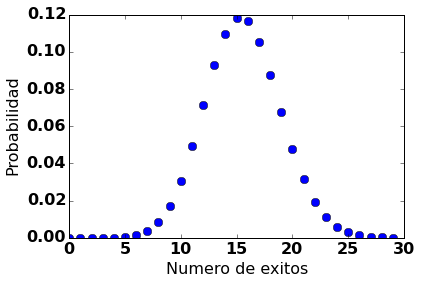

In [6]:
n = suma.size
p = prob
x = np.arange(0,30)
histB = stats.binom.pmf(x, n, p)

plt.figure(1)
plt.rcParams['figure.figsize'] = 20, 6 # para modificar el tamaño de la figura
plt.plot(x, histB, 'bo', ms=8, label='Distribucion binomial')
plt.xlabel('Numero de exitos')
plt.ylabel('Probabilidad')

ProbB = np.sum(histB[0:duda])

print('Probabilidad de que en solo %d ocasiones la suma sea inferior a 6 es %.4f' %(duda,ProbB))

$\textbf{FIGURA 1.}$ Distribución binomial para el ejemplo.

Efectivamente, se obtuvo la misma probabilidad. Note que si se desconoce la probabilidad $p$ esta se puede determinar si se conoce que la distribución es binomial. Una vez se tiene la probabilidad de éxito se pueden determinar las probabilidades para cualquier cantidad de pruebas.

La distribución binomial es de gran utilidad en campos científicos como el control de calidad y las aplicaciones médicas.

## Distribución de Poisson

En un experimento aleatorio en el que se busque medir el número de sucesos o resultados de un tipo que ocurren en un intervalo continuo (número de fotones que llegan a un detector en intervalos de tiempo iguales, número de estrellas en cuadrículas idénticas en el cielo, número de fotones en un modo en un oscilador mecánico cuántico, energía total en un oscilador armónico mecánico cuántico), se le conocerá como proceso de Poisson, y deberá cumplir las siguientes reglas:

- Los resultados de cada intervalo son independientes.
- La probabilidad de que un resultado ocurra en un intervalo pequeño es proporcional al tamaño del intervalo. La probabilidad es constante por lo que se puede definir un valor medio de resultados por unidad de intervalo. El proceso es estable.
- La probabilidad de que ocurra más de un resultado en un intervalo lo suficientemente pequeño es despreciable. El intervalo es tán pequeño que a lo sumo se espera solo un suceso (resultado).

La distribución de Poisson es un caso límite de la distribución binomial cuando el número de eventos $N$ tiende a infinito y la probabilidad de acierto $p$ tiende a cero (ver libro de Squire para la deducción).

La $\textbf{variable aleatoria de Poisson}$ se define como el número de resultados que aparecen en un experimento que sigue el proceso de Poisson. La distribución de probabilidad asociada se denomina distribución de Poisson y depende solo del parámetro medio de resultados $\lambda$.
$$X = (0,1,2,...)$$

$$f(x) = P(X=x) = p(x;\lambda)$$

La expresión para la distribución se obtiene a partir de la binomial (mirar libro de Garcia):
$$p(x;\lambda) = \frac{\lambda^x}{x!} e^{- \lambda}$$

con media $\lambda$ y desviación estándar $\sqrt{\lambda}$.

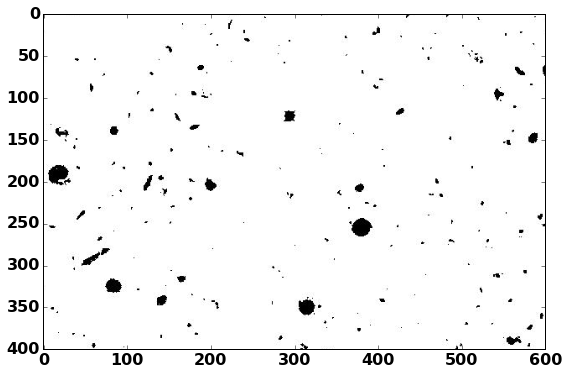

In [7]:
Ima = misc.imread('HDF-bw.jpg') # Se lee la imagen como matriz en escala de 8 bit
plt.rcParams['figure.figsize'] = 20, 6 # para modificar el tamaño de la figura
Imab = Ima[100:500,100:700,1] # La imagen original tenía tres canales (RGB); se elige un canal y se recorta

plt.figure(2)
plt.imshow(Imab, cmap='gray')

$\textbf{FIGURA 2.}$ Galaxias en el espacio profundo.

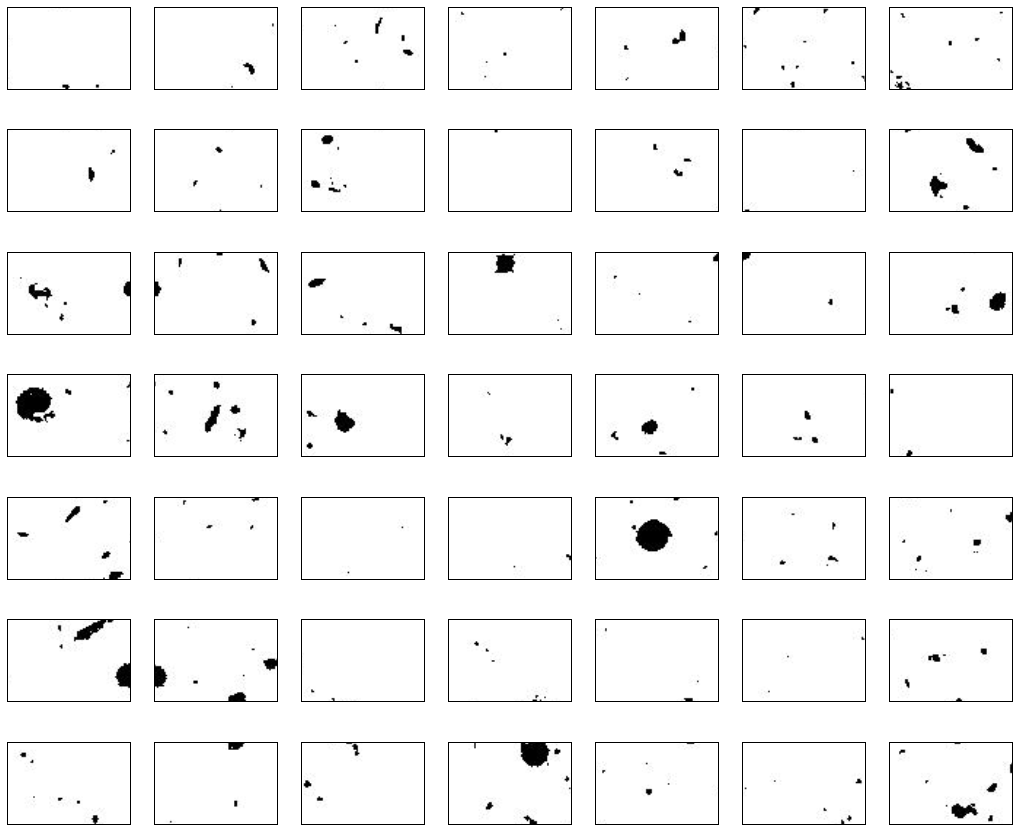

In [17]:
plt.rcParams['figure.figsize'] = 18, 15 # para modificar el tamaño de la figura
fil, col = Imab.shape # número de filas y columnas de la imagen
numlado = 10 # Número de imágenes por lado
contar = 1
plt.figure(5)
for enfil in range(1,numlado+1):
    for encol in range(1,numlado+1):
        plt.subplot(numlado,numlado,contar)
        plt.imshow(Imab[(enfil-1)*np.int(fil/numlado):enfil*np.int(fil/numlado), \
                        (encol-1)*np.int(col/numlado):encol*np.int(col/numlado)],cmap='gray')
        frame1 = plt.gca()
        frame1.axes.get_yaxis().set_visible(False)
        frame1.axes.get_xaxis().set_visible(False)
        contar = contar + 1

Valor promedio del conjunto de datos = 4.33


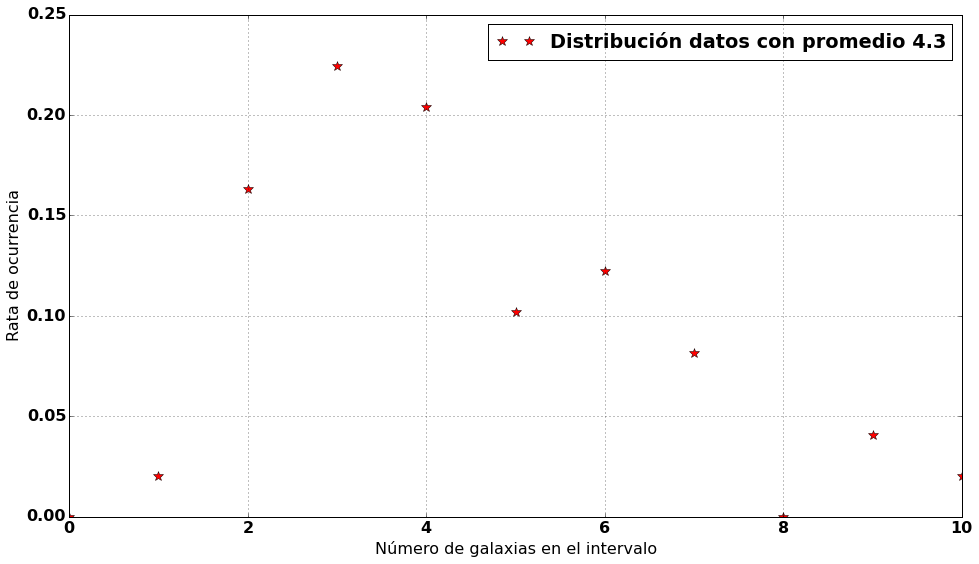

In [27]:
# Para el caso de 7x7 imágenes en gal se presentan el número de galaxias contadas
gal = np.array([2., 3., 6., 5., 4., 9., 10., \
                2., 3., 7., 1., 3., 1., 6., \
               6., 5., 4., 3., 4., 2., 4., \
               4., 6., 3., 3., 4., 3., 2., \
               5., 4., 2., 2., 6., 5., 9., \
               4., 7., 2., 3., 3., 3., 5., \
               6., 3., 4., 7., 4., 6., 7.])
la = np.mean(gal) # Valor promedio del conjunto de datos

# Distribución del conjunto de datos. La primera fila es el número de galaxias, la segunda es el número de veces que
# se repite dicho número de galaxias
distriGal = np.array([[0., 1., 2., 3., 4., 5., 6., 7., 8., 9., 10.],[0., 1., 8., 11., 10., 5., 6., 4., 0., 2., 1.]])

print('Valor promedio del conjunto de datos = %.2f' % la)
plt.figure(figsize=(16,9))
plt.plot(distriGal[0,:],distriGal[1,:]/gal.size,'r*',ms=10,label='Distribución datos con promedio %.1f' % la)
plt.legend()
plt.xlabel('Número de galaxias en el intervalo')
plt.ylabel('Rata de ocurrencia')
plt.grid()

Si decimos que la distribución que se determinó en el paso anterior es una distribución de Poisson (suposición), podemos decir cosas como:

In [24]:
num = 2. # Número de galaxias que se espera encontrar
prob = (la**num*np.exp(-la)/math.factorial(num))*100 # Probabilidad de encontrar dicho número de galaxias

x = np.arange(0,20) # rango de datos: número de galaxias
histP = stats.poisson.pmf(x, la) # función de probabilidad de Poisson
ProbP = (np.sum(histP[0:int(num)+1]))*100 # Probabilidad acumulada

print('Promedio de galaxias en el área estudiada = %.2f' % la)
print('La probabilidad de que se observe en la imagen del espacio profundo %d galaxias es = %.1f%%' % (num,prob))
print('Probabilidad de observar hasta %d galaxias = %.1f%%' %(num,ProbP))

Promedio de galaxias en el área estudiada = 4.33
La probabilidad de que se observe en la imagen del espacio profundo 2 galaxias es = 12.4%
Probabilidad de observar hasta 2 galaxias = 19.4%


Comparemos ahora la distribución obtenida con la correspondiente distribución de Poisson:

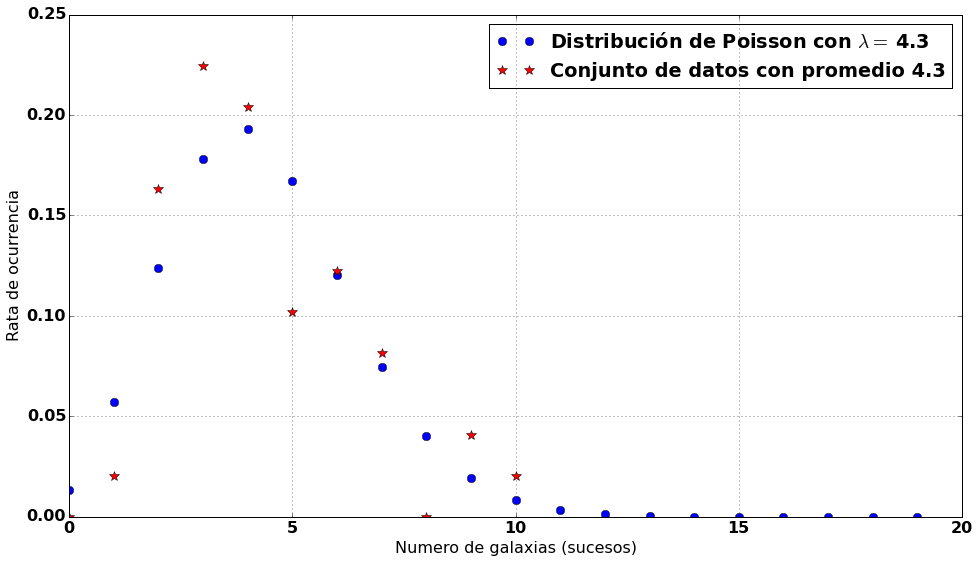

In [26]:
plt.figure(figsize=(16,9))
plt.plot(x, histP, 'bo', ms=8, label='Distribución de Poisson con $\lambda=$ %.1f' % la)
plt.plot(distriGal[0,:],distriGal[1,:]/gal.size,'r*',ms=10,label='Conjunto de datos con promedio %.1f' % la)
plt.xlabel('Numero de galaxias (sucesos)')
plt.ylabel('Rata de ocurrencia')
plt.legend()
plt.grid()

$\textbf{FIGURA 3.}$ Distribución de Poisson ideal con respecto a la generada por los datos.

Finalmente observemos como la distribución de Poisson tiende a la forma de una distribución normal. 

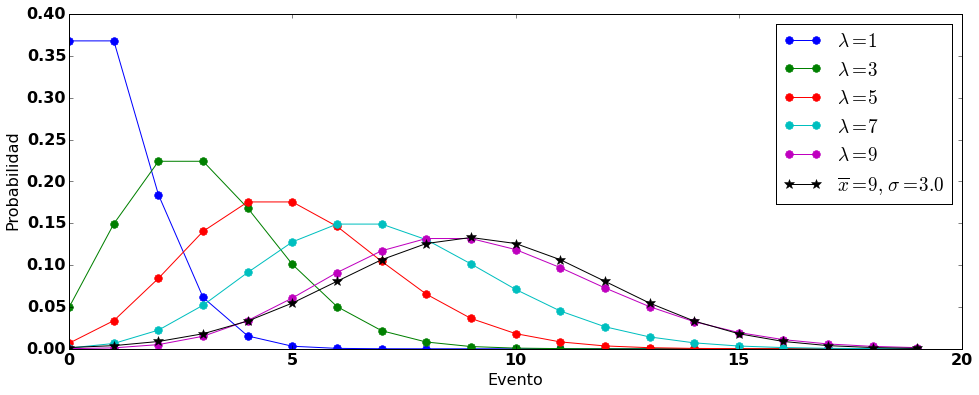

In [30]:
plt.figure(4)
plt.rcParams['figure.figsize'] = 12, 6 # para modificar el tamaño de la figura


probP = np.zeros(20)
for la in range(1,10,2):
    for num in range(0,20):
        probP[num] = la**num*np.exp(-la)/math.factorial(num)
        
    plt.plot(probP,marker='.',ms=15,label='$\lambda = %d$' %la)



mu = la # media aritmética
sigma = np.sqrt(la) # desviación estándar
x = np.arange(0,20,1)
f = (1./np.sqrt(2*np.pi*sigma**2))*np.exp(-(x-mu)**2/(2*sigma**2))

plt.plot(f,marker='*',ms=10,color='black',label='$ \overline{x} = %d , \ \sigma = %.1f$'%(mu,sigma))
plt.xlabel('Evento')
plt.ylabel('Probabilidad')
plt.legend()

$\textbf{FIGURA 4.}$ Distribución de Poisson y aproximación a la distribución normal.

Note que a medida que el parámetro $\lambda$ crece la distribución de Poisson tiende a la distribución normal con media aritmética $\lambda$ y desviación estándar $\sqrt \lambda$.

$\textbf{TAREA}$:
- Graficar las distribuciones de probabilidad acumulada de la distribución binomial y Poisson.
- Repetir el procedimiento de la imagen de las galaxias pero ahora con un total de 10 x 10 cuadros.